## CONTEXT


The Instacart stakeholders are most interested in the variety of customers in their database along with their purchasing behaviors. They assume they can't target everyone using the same methods, and they’re considering a targeted marketing strategy. They want to target different customers with applicable marketing campaigns to see whether they have an effect on the sale of their products. Your analysis will inform what this strategy might look like to ensure Instacart targets the right customer profiles with the appropriate products. The stakeholders would like to be able to answer some key questions.


#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [2]:
# identifying path
path = '/Users/Ana/Documents/Instacart Basket Analysis'

In [4]:
#executing path
path

'/Users/Ana/Documents/Instacart Basket Analysis'

#### Importing data

In [5]:
# Importing dataset
df_opan = pd.read_pickle(os.path.join(path, '02 Data', 'orders_products_customers_profiled.pkl'))

In [6]:
# removing merge flag from df_opan
df_opan = df_opan.drop(columns=['_merge'])

In [8]:
# Importing dataset
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'departments_wrangled.csv'))

In [9]:
#check
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
# Renaming Unnamed: 0 to department_id
df_dep.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [11]:
df_opan.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income', 'region', 'activity', 'age_group_flag', 'income_flag',
       'household_size_flag', 'child_age_flag', 'pets_flag'],
      dtype='object')

### Orders by weekdays

Text(0.5, 0, 'Days')

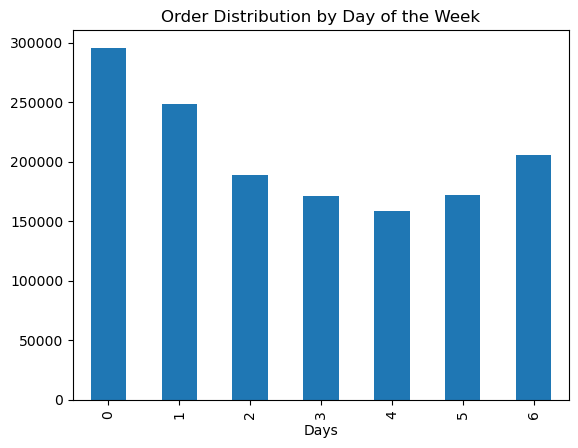

In [13]:
# creating bar chart sorted by index
bar_orders_by_dow = df_opan['order_dow'].value_counts().sort_index().plot.bar()
plt.title('Order Distribution by Day of the Week')
plt.xlabel('Days')

In [14]:
# Export chart
bar_orders_by_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_by_dow.png'))

### Order Frequency and Loyalty

In [19]:
# create crosstab loyalty_frequency flag
loyalty_freq = pd.crosstab(df_opan['order_frequency_flag'], df_opan['loyalty_flag'])

In [20]:
loyalty_freq

loyalty_flag,New customer
order_frequency_flag,
Frequent customer,355501
Non-frequent customer,742226
Regular customer,343821


### Orders by Department

In [23]:
df_opan.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income', 'region', 'activity', 'age_group_flag', 'income_flag',
       'household_size_flag', 'child_age_flag', 'pets_flag'],
      dtype='object')

In [24]:
# reduce df 
df_opan_redux = df_opan[['order_id','user_id','department_id']]

In [25]:
# merging reduced df_opan with df_dep 
df_opand = df_opan_redux.merge(df_dep, on = 'department_id', indicator = True)

In [26]:
df_opand.head()

,order_id,user_id,department_id,department,_merge
0,520620,120,7,beverages,both
1,3273029,120,7,beverages,both
2,520620,120,7,beverages,both
3,3273029,120,7,beverages,both
4,906054,120,7,beverages,both


In [27]:
df_opand['_merge'].value_counts(dropna=False)

_merge
both          1441548
left_only           0
right_only          0
Name: count, dtype: int64

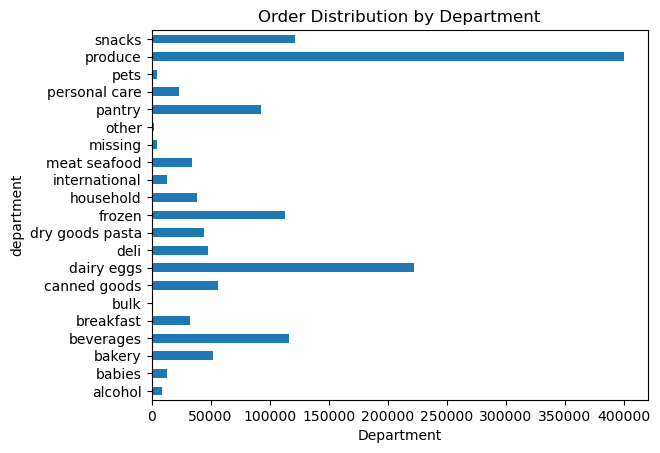

In [28]:
# creating bar chart sorted by index
bar_orders_by_dep = df_opand['department'].value_counts().sort_index().plot.barh()
plt.title('Order Distribution by Department')
plt.xlabel('Department')
plt.savefig('bar_orders_dep.png', bbox_inches='tight')

### Orders by Department and hour of day

In [29]:
# creating reduced df 
df_opan_redux2 = df_opan[['order_id','user_id','department_id','order_hour_of_day']]

In [30]:
# merging reduced df_opan with df_dep 
df_opand2 = df_opan_redux2.merge(df_dep, on = 'department_id', indicator = True)

In [31]:
# creating crosstab for departments and hour of day
hod_dep = pd.crosstab(df_opand2['order_hour_of_day'], df_opand2['department'])

In [32]:
hod_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,36,83,346,897,215,7,386,1530,347,347,...,228,90,236,24,15,673,160,40,3320,899
1,25,28,167,507,146,3,264,913,193,189,...,164,68,137,25,10,457,93,8,1705,463
2,9,14,109,305,85,0,163,517,115,116,...,104,38,72,17,6,255,60,14,1030,306
3,16,8,89,235,59,0,93,388,80,94,...,83,20,60,11,3,195,35,4,628,202
4,23,33,91,207,48,1,92,410,87,67,...,87,41,54,7,1,164,49,6,677,154
5,8,30,131,335,84,3,118,557,131,110,...,105,29,88,17,3,189,84,14,972,267
6,50,109,367,764,232,12,329,1615,319,296,...,332,75,186,28,19,608,178,33,2555,708
7,98,497,1036,2272,756,19,928,4466,841,748,...,835,204,586,117,33,1712,559,88,7771,2310
8,223,755,2285,4987,1470,41,2030,9665,1731,1665,...,1736,473,1337,179,82,3726,1051,220,16548,4804


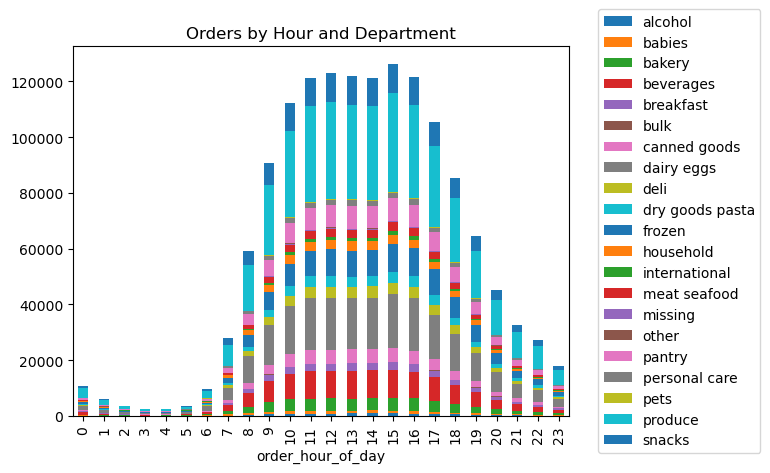

In [33]:
# create bar chart for loyality and frequency
bar_hod_dep = hod_dep.plot(kind= 'bar', stacked = True)
plt.title('Orders by Hour and Department')
bar_hod_dep.legend(loc='center right',  bbox_to_anchor=(1.4, 0.5), ncol=1)
plt.savefig('bar_hod_dep.png', bbox_inches='tight')

In [38]:
# Export chart
bar_hod_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hod_dep.png'))

### Orders by Department & Loyalty

In [34]:
# creating reduced df 
df_opan_redux3 = df_opan[['order_id','user_id','department_id','order_hour_of_day','loyalty_flag']]

In [35]:
# merging reduced df_opan with df_dep 
df_opand3 = df_opan_redux3.merge(df_dep, on = 'department_id', indicator = True)

In [36]:
# creating crosstab for departments and loyalty
loy_dep = pd.crosstab(df_opand3['department'], df_opand3['loyalty_flag'])

### Orders by Region

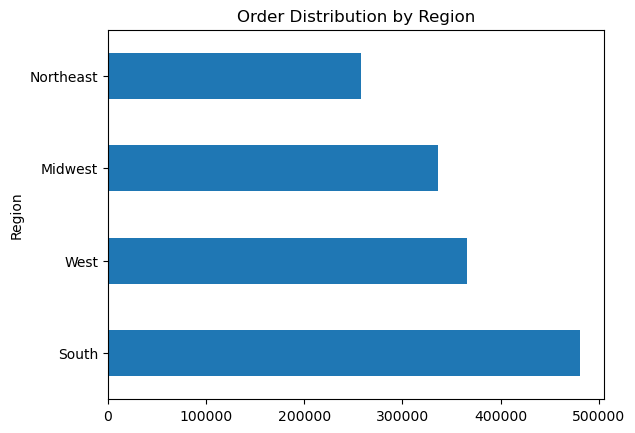

In [39]:
# creating bar chart orders by region
bar_orders_by_reg = df_opan['region'].value_counts().plot.barh()
plt.title('Order Distribution by Region')
plt.ylabel('Region')
plt.savefig('bar_orders_reg.png', bbox_inches='tight')

In [40]:
# Export chart
bar_orders_by_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_by_reg.png'))

In [41]:
# creating new reduced df 
df_opan_redux4 = df_opan[['order_id','user_id','department_id','order_hour_of_day','loyalty_flag','region']]

In [42]:
# merging reduced df_opan with df_dep 
df_opand4 = df_opan_redux4.merge(df_dep, on = 'department_id', indicator = True)

In [43]:
# creating crosstab for departments and loyalty
reg_dep = pd.crosstab(df_opand4['department'], df_opand4['region'])

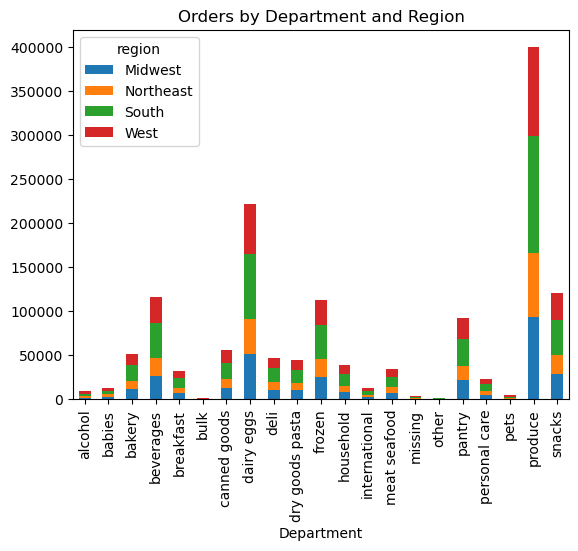

In [44]:
# creating bar chart 
bar_reg_dep = reg_dep.plot(kind= 'bar', stacked = True)
plt.title('Orders by Department and Region')
plt.xlabel('Department')
plt.savefig('bar_ords_reg_dep.png', bbox_inches='tight')

In [45]:
# Export chart
bar_reg_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_reg_dep.png'))

### Age & Family Status

In [46]:
# creating crosstab for marital status and age group
age_marital = pd.crosstab(df_opan['age_group_flag'], df_opan['marital_status'])

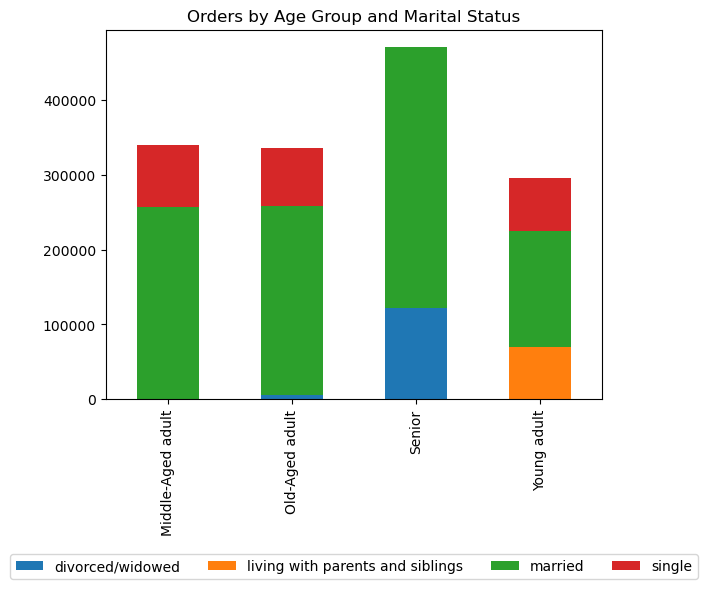

In [47]:
# creating bar chart 
bar_age_marital = age_marital.plot(kind= 'bar', stacked = True)
plt.title('Orders by Age Group and Marital Status')
plt.xlabel('')
bar_age_marital.legend(loc='upper center',  bbox_to_anchor=(0.5, -0.4), ncol=4)
plt.savefig('bar_ords_age_marital.png', bbox_inches='tight')

In [48]:
# Export chart
bar_age_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_marital.png'))

### Bulk Department & Region

In [62]:
# creating crosstab for region and departments
bulk = pd.crosstab(df_opan['department_id'], df_opan['region'])

In [63]:
bulk

region,Midwest,Northeast,South,West
department_id,,,,
1,25877,20494,38020,28699
2,437,317,633,493
3,12163,9332,17239,13027
4,93821,72835,133073,100286
5,2143,1525,2811,2590
6,3070,2213,4493,3486
7,26595,20491,39522,29617
8,998,867,1360,1434
9,10306,7999,14631,11555
